In [1]:
# --- Importing Libraries ---
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import missingno as mso
import plotly.express as px
import seaborn as sns
import matplotlib.gridspec as gridspec
import warnings
from scipy.stats import mode

# --- Libraries Settings ---
warnings.filterwarnings('ignore')
sns.set_style('white')

In [2]:
# Reading the Train and Test CSV files
train = pd.read_csv("Train.csv")
test = pd.read_csv("Test.csv")

In [3]:
# --- Reading Train Dataset ---
train.head(10).style.background_gradient(cmap='YlOrRd').set_properties(**{'border': '1px solid black'})

In [4]:
# --- Describing Train Dataset ---
print('.: Train Dataset Description :.')
print('*' * 31)
train.describe(include='all').style.set_properties(**{'border': '1px solid black'})

.: Train Dataset Description :.
*******************************


In [5]:
# --- Printing Train Dataset Info ---
print('.: Train Dataset Info :.')
print('*' * 23)
print('Total Rows:', train.shape[0])
print('Total Columns:', train.shape[1])

.: Train Dataset Info :.
***********************
Total Rows: 8523
Total Columns: 12


In [6]:
# --- Printing Train Dataset Detail ---
print('.: Train Dataset Details :.')
print('*' * 27)
train.info()

.: Train Dataset Details :.
***************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage:

In [7]:
# --- Reading Test Dataset ---
test.head(10).style.background_gradient(cmap='summer').set_properties(**{'border': '1px solid black'})

In [8]:
# --- Describing Test Dataset ---
print('.: Test Dataset Description :.')
print('*' * 30)
test.describe(include='all').style.set_properties(**{'border': '1px solid black'})

.: Test Dataset Description :.
******************************


In [9]:
# --- Printing Test Dataset Info ---
print('.: Test Dataset Info :.')
print('*' * 23)
print('Total Rows:', test.shape[0])
print('Total Columns:', test.shape[1])

.: Test Dataset Info :.
***********************
Total Rows: 5681
Total Columns: 11


In [10]:
# --- Printing Test Dataset Detail ---
print('.: Test Dataset Details :.')
print('*' * 27)
test.info()

.: Test Dataset Details :.
***************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [11]:
# --- Join both the train and test dataset ---
train['source']='Train'
test['source']='Test'

dataset = pd.concat([train,test], ignore_index = True)

print('.: Train Dataset Shape :.')
print('*' * 25)
print('Total Rows:', train.shape[0])
print('Total Columns:', train.shape[1])

print('\n.: Test Dataset Shape :.')
print('*' * 24)
print('Total Rows:', test.shape[0])
print('Total Columns:', test.shape[1])


print('\n.: Concatenated Dataset Shape :.')
print('*' * 32)
print('Total Rows:', dataset.shape[0])
print('Total Columns:', dataset.shape[1])

.: Train Dataset Shape :.
*************************
Total Rows: 8523
Total Columns: 13

.: Test Dataset Shape :.
************************
Total Rows: 5681
Total Columns: 12

.: Concatenated Dataset Shape :.
********************************
Total Rows: 14204
Total Columns: 13


In [12]:
# --- Reading Combined Dataset (From Top) ---
dataset.head(10).style.background_gradient(cmap='BuPu').set_properties(**{'border': '1px solid black'})

In [13]:
# --- Reading Combined Dataset (From Bottom) ---
dataset.tail(10).style.background_gradient(cmap='BuPu').set_properties(**{'border': '1px solid black'})

In [14]:
# --- Printing Combined Dataset Detail ---
print('.: Combined Dataset Details :.')
print('*' * 30)
dataset.info()

.: Combined Dataset Details :.
******************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11765 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                10188 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          8523 non-null   float64
 12  source                     14204 non-nul

In [15]:
# --- Percentage of test set in the dataset ---
print('.: Percentage of Test Dataset in Combined Dataset :.')
print('*' * 52)
print(dataset["Item_Outlet_Sales"].isnull().sum()/dataset.shape[0]*100,"%")

.: Percentage of Test Dataset in Combined Dataset :.
****************************************************
39.995775837792166 %


In [16]:
# --- Data Visualization for Item_Type in combined dataset ---
# --- Setting Colors, Labels, Order ---
label1=dataset['Item_Type'].dropna().unique()
order1=dataset['Item_Type'].value_counts().index

# --- Counting Categorical Labels without Dropping Null Values ---
print('*' * 36)
print('.: Item Type List (Dataset) :.')
print('*' * 36)
dataset.Item_Type.value_counts(dropna=False)

************************************
.: Item Type List (Dataset) :.
************************************


Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64

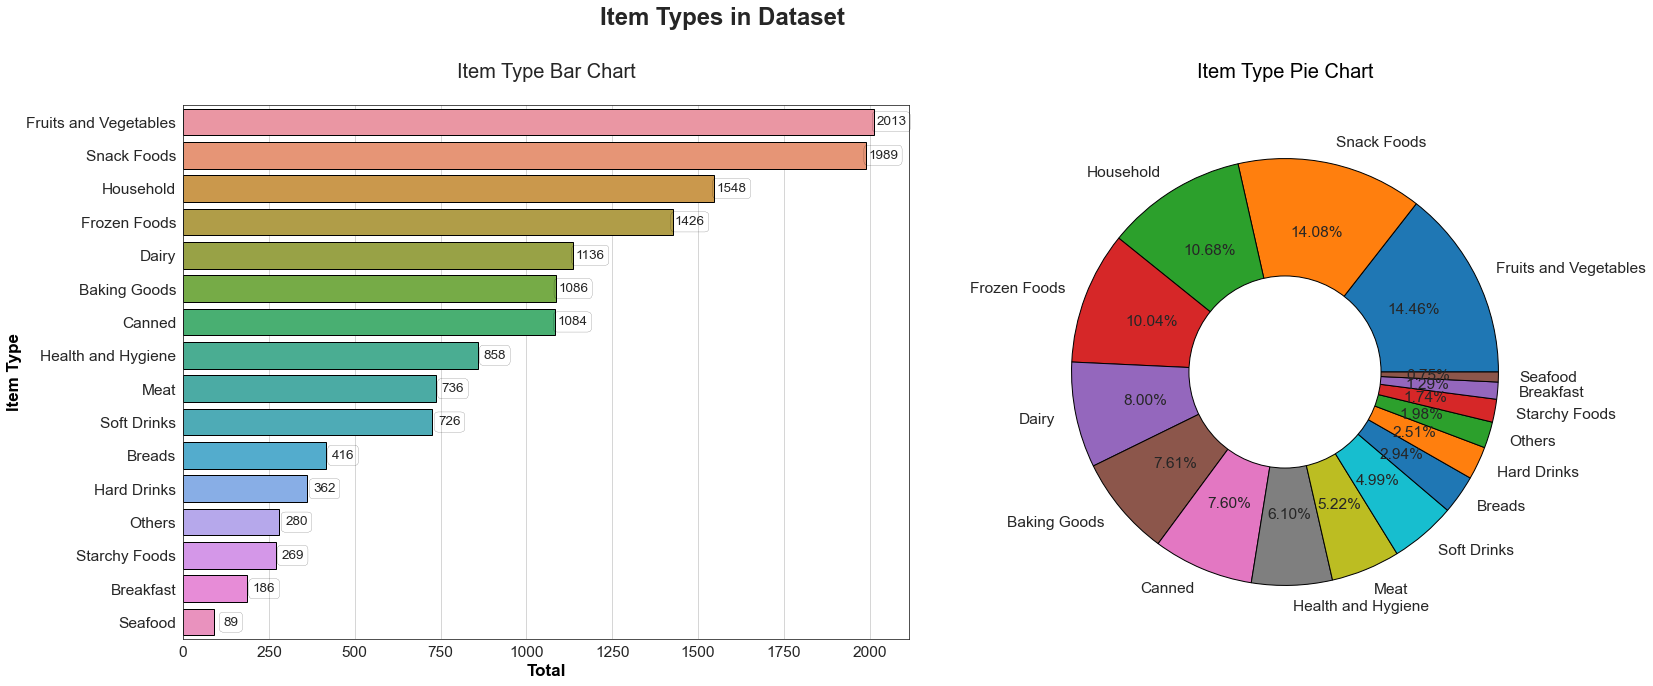

In [17]:
# --- Size for Both Figures ---
plt.figure(figsize=(20, 10))
plt.suptitle('Item Types in Dataset', fontweight='bold', fontsize='24', fontfamily='sans-serif')

# --- Histogram ---
countplt = plt.subplot(1, 2, 1)
plt.title('Item Type Bar Chart\n', fontsize=20, fontfamily='sans-serif')
ax = sns.countplot(y='Item_Type', data=dataset, order=order1, edgecolor='black')
for rect in ax.patches:
    width, height = rect.get_width(), rect.get_height()
    x, y = rect.get_xy()
    ax.text (x+width+50, y+height/2, '{:.0f}'.format(width), horizontalalignment='center', verticalalignment='center', fontsize=13.5, bbox=dict(facecolor='none', edgecolor='black', linewidth=0.15, boxstyle='round'))
    ax.tick_params(axis='x', labelsize=15.5)
    ax.tick_params(axis='y', labelsize=15.5)
plt.tight_layout(rect=[0, 0.04, 1.15, 0.965])
plt.xlabel('Total', fontweight='bold', fontsize=17, fontfamily='sans-serif', color='black')
plt.ylabel('Item Type', fontweight='bold', fontsize=17, fontfamily='sans-serif', color='black')
plt.grid(axis='x');
countplt

# --- Pie Chart ---
plt.subplot(1, 2, 2)
plt.title('Item Type Pie Chart\n', fontsize=20, fontfamily='sans-serif', color='black')
plt.pie(train['Item_Type'].value_counts(), labels=order1, pctdistance=0.67, autopct='%.2f%%', wedgeprops=dict(edgecolor='black'), textprops={'fontsize':15.5})
centre=plt.Circle((0, 0), 0.45, fc='white', edgecolor='black')
plt.gcf().gca().add_artist(centre);

.: Combined Dataset Null Values:.
*********************************


Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

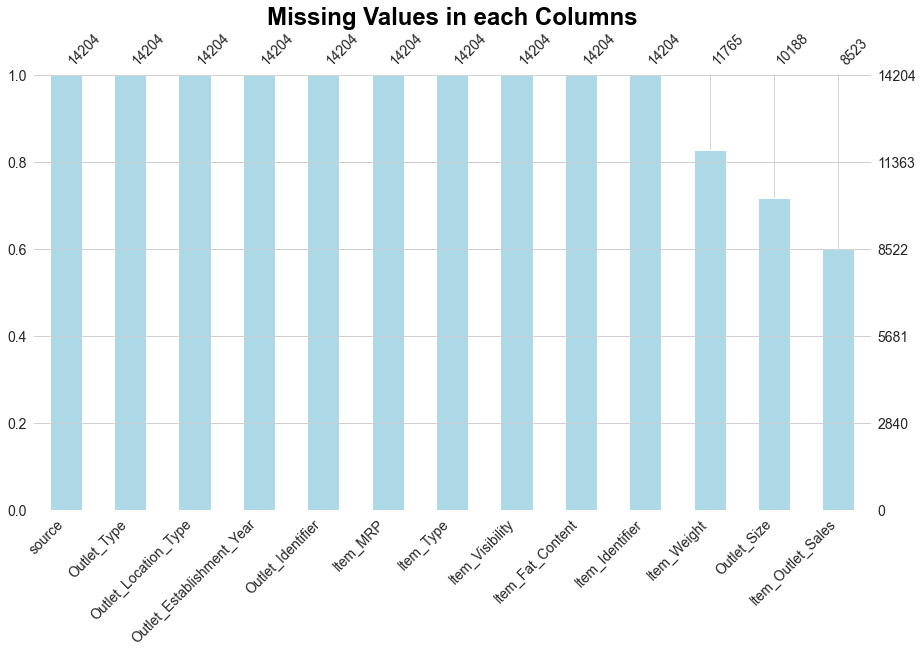

In [18]:
sns.set_style('whitegrid')

# --- Ploting Missing Values ---
mso.bar(dataset, fontsize=14, figsize=(15, 8), sort='descending', labels=True, color='lightblue')

# --- Title Settings ---
plt.title('Missing Values in each Columns', fontweight='bold', fontsize='24', fontfamily='sans-serif', color='black')
plt.grid(axis='both', alpha=0);

# ---Checking Null Values in Combined Dataset ---
print('.: Combined Dataset Null Values:.')
print('*' * 33)
dataset.isnull().sum()

In [19]:
# --- Calculating mean value of Item_Weight for every Unique item present in dataset ---
# --- pivot_table() allows us to create a table that contains the mean values of identifiers ---
avg = pd.pivot_table(dataset,values='Item_Weight', index='Item_Identifier',aggfunc='mean')
avg

Item_Weight
Item_Identifier             
DRA12                 11.600
DRA24                 19.350
DRA59                  8.270
DRB01                  7.390
DRB13                  6.115
...                      ...
NCZ30                  6.590
NCZ41                 19.850
NCZ42                 10.500
NCZ53                  9.600
NCZ54                 14.650

[1559 rows x 1 columns]

In [20]:
# --- Cross verifying the mean value by checking a particular item in dataset ---
df=dataset[dataset['Item_Identifier'].str.contains("DRA24")]
df.style.set_properties(**{'border': '1px solid black'})

In [21]:
# --- Updating the null weight values of dataset with mean values ---
dataset[:][dataset['Item_Identifier'] == 'DRI11']
def impute(cols):
    Weight = cols[1]
    Identifier = cols[0]
    
    if pd.isnull(Weight):
        return avg['Item_Weight'][avg.index == Identifier]
    else:
        return Weight

print ('Orignal Number of missing values in Item_Weight:',sum(dataset['Item_Weight'].isnull()))

# --- Applying the impute() function to impute null values of Item_Weight ---
dataset['Item_Weight'] = dataset[['Item_Identifier','Item_Weight']].apply(impute,axis=1).astype(float)

print ('Number of missing values in Item_Weight after imputation: ',sum(dataset['Item_Weight'].isnull()))

Orignal Number of missing values in Item_Weight: 2439
Number of missing values in Item_Weight after imputation:  0


In [22]:
# --- Cross verifying the mean value is updated or not by checking a particular item in dataset ---
df=dataset[dataset['Item_Identifier'].str.contains("DRA24")]
df.style.set_properties(**{'border': '1px solid black'})

.: Outlet Type Combined Data :.
*******************************


Supermarket Type1    9294
Grocery Store        1805
Supermarket Type3    1559
Supermarket Type2    1546
Name: Outlet_Type, dtype: int64

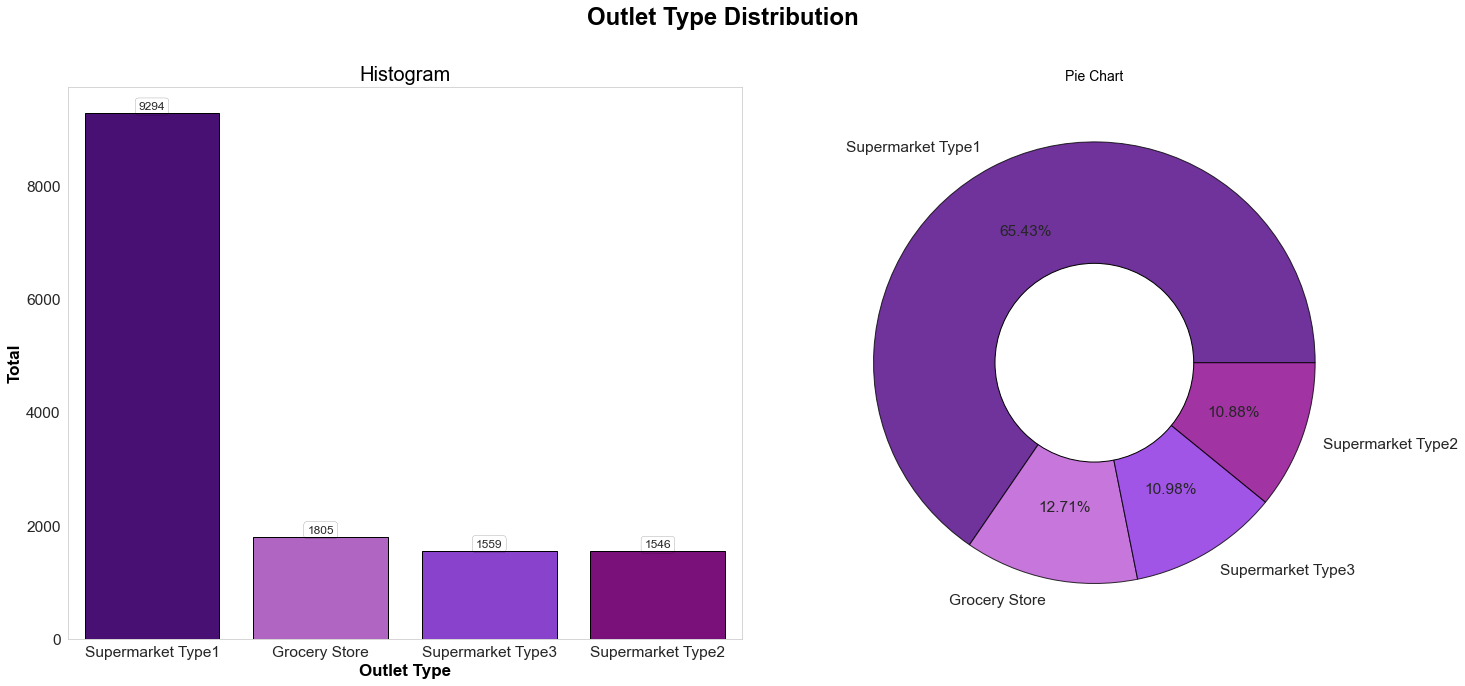

In [23]:
# --- Data Visualization for Outlet Type of Comined Dataset ---
# --- Setting Colors, Labels, Order ---
custom_colors = ['indigo', 'mediumorchid', 'blueviolet', 'darkmagenta']
labels=dataset['Outlet_Type'].dropna().unique()
order=dataset['Outlet_Type'].value_counts().index

# --- Size for Both Figures ---
plt.figure(figsize=(20, 10))
plt.suptitle('Outlet Type Distribution', fontweight='bold', fontsize='24', fontfamily='sans-serif', color='black')

# --- Histogram ---
countplt = plt.subplot(1, 2, 1)
plt.title('Histogram', fontsize=20, fontfamily='sans-serif', color='black')
ax = sns.countplot(x='Outlet_Type', data=dataset, palette=custom_colors, order=order, edgecolor='black')
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, rect.get_height()+60,rect.get_height(), horizontalalignment='center', fontsize=12, bbox=dict(facecolor='none', edgecolor='black', linewidth=0.15, boxstyle='round'))
    ax.tick_params(axis='x', labelsize=15.5)
    ax.tick_params(axis='y', labelsize=15.5)
plt.tight_layout(rect=[0, 0.04, 1, 0.96])
plt.xlabel('Outlet Type', fontweight='bold', fontsize=17, fontfamily='sans-serif', color='black')
plt.ylabel('Total', fontweight='bold', fontsize=17, fontfamily='sans-serif', color='black')
plt.grid(axis='y')
countplt

# --- Pie Chart ---
plt.subplot(1, 2, 2)
plt.title('Pie Chart', fontsize=14, fontfamily='sans-serif', color='black')
plt.pie(dataset['Outlet_Type'].value_counts(), labels=order, colors=custom_colors, pctdistance=0.67, autopct='%.2f%%', wedgeprops=dict(alpha=0.8, edgecolor='black'), textprops={'fontsize':15.5})
centre=plt.Circle((0, 0), 0.45, fc='white', edgecolor='black')
plt.gcf().gca().add_artist(centre);

# --- Count Categorical Labels without Dropping Null Values ---
print('.: Outlet Type Combined Data :.')
print('*' * 31)
dataset.Outlet_Type.value_counts(dropna=False)

.: Outlet Size Total :.
***********************


Medium    4655
NaN       4016
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

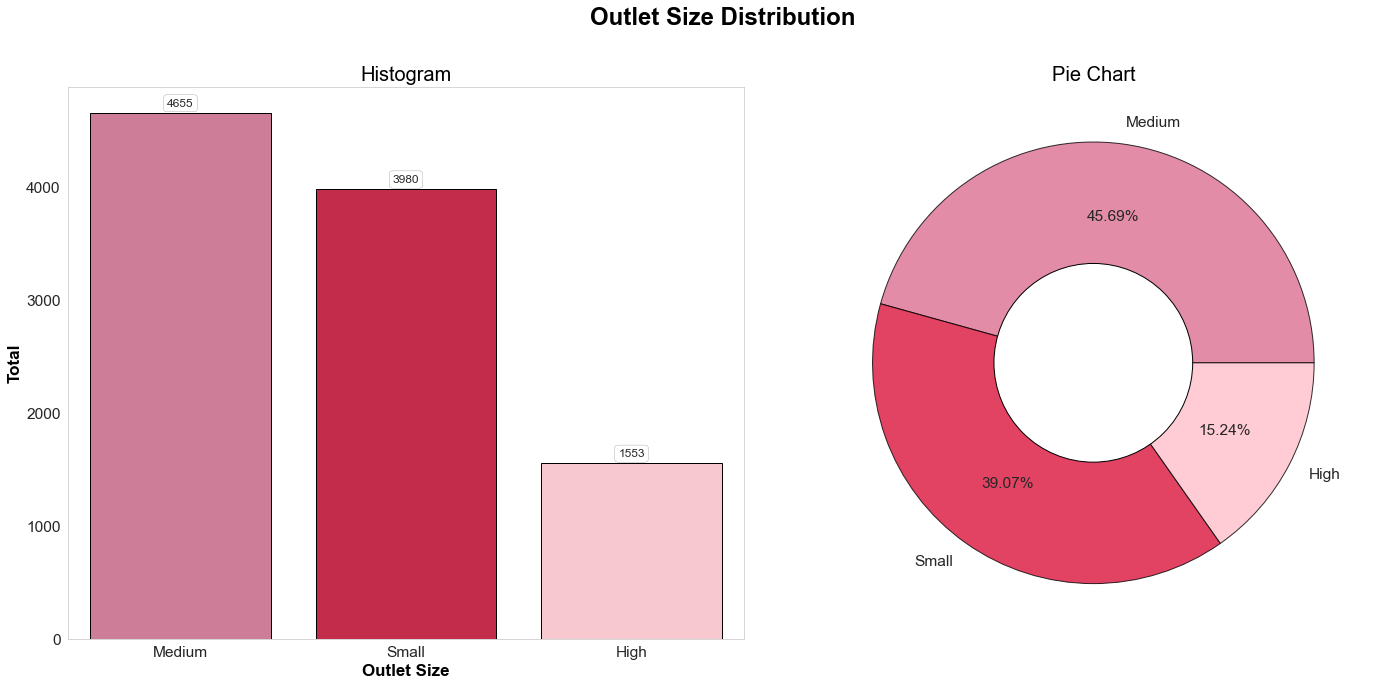

In [24]:
# --- Data Visualization for Outlet Size of Combined Dataset(including null values) ---
# --- Setting Colors, Labels, Order ---
custom_colors = ['palevioletred', 'crimson', 'pink']
labels=dataset['Outlet_Size'].dropna().unique()
order=dataset['Outlet_Size'].value_counts().index

# --- Size for Both Figures ---
plt.figure(figsize=(20,10))
plt.suptitle('Outlet Size Distribution', fontweight='bold', fontsize='24', fontfamily='sans-serif', color='black')

# --- Histogram ---
countplt = plt.subplot(1, 2, 1)
plt.title('Histogram', fontsize=20, fontfamily='sans-serif', color='black')
ax = sns.countplot(x='Outlet_Size', data=dataset, palette=custom_colors, order=order, edgecolor='black')
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, rect.get_height()+60,rect.get_height(), horizontalalignment='center', fontsize=12, bbox=dict(facecolor='none', edgecolor='black', linewidth=0.15, boxstyle='round'))
    ax.tick_params(axis='x', labelsize=15.5)
    ax.tick_params(axis='y', labelsize=15.5)
plt.tight_layout(rect=[0, 0.04, 1, 0.96])
plt.xlabel('Outlet Size', fontweight='bold', fontsize=17, fontfamily='sans-serif', color='black')
plt.ylabel('Total', fontweight='bold', fontsize=17, fontfamily='sans-serif', color='black')
plt.grid(axis='y')
countplt

# --- Pie Chart ---
plt.subplot(1, 2, 2)
plt.title('Pie Chart', fontsize=20, fontfamily='sans-serif', color='black')
plt.pie(dataset['Outlet_Size'].value_counts(), labels=order, colors=custom_colors, pctdistance=0.67, autopct='%.2f%%', wedgeprops=dict(alpha=0.8, edgecolor='black'), textprops={'fontsize':15.5})
centre=plt.Circle((0, 0), 0.45, fc='white', edgecolor='black')
plt.gcf().gca().add_artist(centre);

# --- Count Categorical Labels without Dropping Null Values ---
print('.: Outlet Size Total :.')
print('*' * 23)
dataset.Outlet_Size.value_counts(dropna=False)

In [25]:
# --- Calculating mode value of Outlet Size for every Unique Outlet Type present in dataset ---
# --- pivot_table() allows us to create a table that contains the mode of identifiers ---
mode = pd.pivot_table(dataset, values='Outlet_Size', columns='Outlet_Type',aggfunc=lambda x:x.mode())
mode

Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2  \
Outlet_Size         Small             Small            Medium   

Outlet_Type Supermarket Type3  
Outlet_Size            Medium

In [26]:
# --- Updating the null outlet size values of dataset with mode values ---
# --- Imputing Outlet_Size missing values with their mode ---
def impute_mode(cols):
    size = cols[1]
    Type = cols[0]
    
    if pd.isnull(size):
        return mode.loc['Outlet_Size'][mode.columns == Type][0]
    else:
        return size
print ('Orignal Number of missing values in Outlet_Size:',sum(dataset['Outlet_Size'].isnull()))

# Applying the impute() function to impute null values of Item_Weight
dataset['Outlet_Size'] = dataset[['Outlet_Type','Outlet_Size']].apply(impute_mode,axis=1)

print ('Number of missing values in Outlet_Size after imputation: ',sum(dataset['Outlet_Size'].isnull()))

Orignal Number of missing values in Outlet_Size: 4016
Number of missing values in Outlet_Size after imputation:  0


.: Outlet Size Total :.
*************************


Small     7996
Medium    4655
High      1553
Name: Outlet_Size, dtype: int64

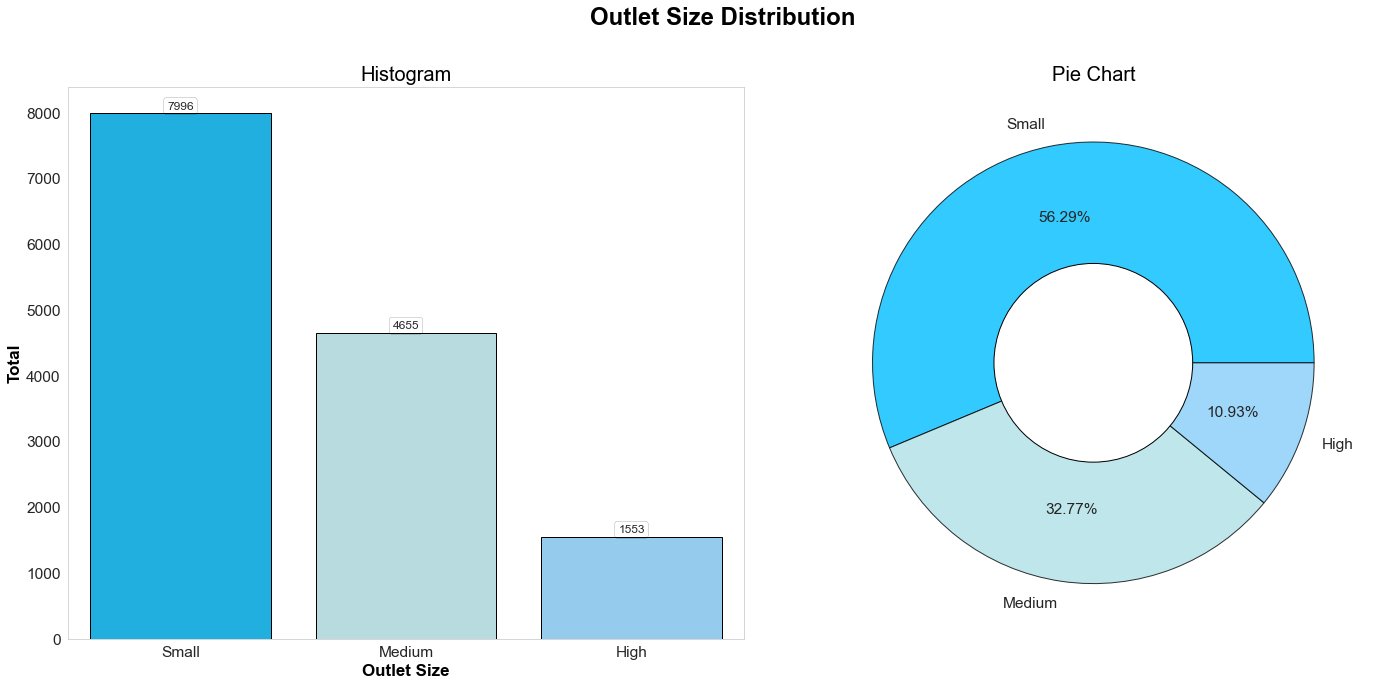

In [27]:
# --- Data Visualization for Outlet Size of Combined Dataset ---
# --- Setting Colors, Labels, Order ---
custom_colors = ['deepskyblue', 'powderblue', 'lightskyblue'] 
labels=dataset['Outlet_Size'].dropna().unique()
order=dataset['Outlet_Size'].value_counts().index

# --- Size for Both Figures ---
plt.figure(figsize=(20,10))
plt.suptitle('Outlet Size Distribution', fontweight='bold', fontsize='24', fontfamily='sans-serif', color='black')

# --- Histogram ---
countplt = plt.subplot(1, 2, 1)
plt.title('Histogram', fontsize=20, fontfamily='sans-serif', color='black')
ax = sns.countplot(x='Outlet_Size', data=dataset, palette=custom_colors, order=order, edgecolor='black')
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, rect.get_height()+60,rect.get_height(), horizontalalignment='center', fontsize=12, bbox=dict(facecolor='none', edgecolor='black', linewidth=0.15, boxstyle='round'))
    ax.tick_params(axis='x', labelsize=15.5)
    ax.tick_params(axis='y', labelsize=15.5)
plt.tight_layout(rect=[0, 0.04, 1, 0.96])
plt.xlabel('Outlet Size', fontweight='bold', fontsize=17, fontfamily='sans-serif', color='black')
plt.ylabel('Total', fontweight='bold', fontsize=17, fontfamily='sans-serif', color='black')
plt.grid(axis='y')
countplt

# --- Pie Chart ---
plt.subplot(1, 2, 2)
plt.title('Pie Chart', fontsize=20, fontfamily='sans-serif', color='black')
plt.pie(dataset['Outlet_Size'].value_counts(), labels=order, colors=custom_colors, pctdistance=0.67, autopct='%.2f%%', wedgeprops=dict(alpha=0.8, edgecolor='black'), textprops={'fontsize':15.5})
centre=plt.Circle((0, 0), 0.45, fc='white', edgecolor='black')
plt.gcf().gca().add_artist(centre);

# --- Count Categorical Labels w/out Dropping Null Walues ---
print('.: Outlet Size Total :.')
print('*' * 25)
dataset.Outlet_Size.value_counts(dropna=False)

In [28]:
# --- Data Visualization for Outlet Type and Outlet Size of Combined Dataset ---
fig1=px.sunburst(dataset,path=['Outlet_Type','Outlet_Location_Type'], color_continuous_scale='Cividis')
fig1.update_layout(title='Outlet Type with Outlet Size',title_x=0.5)
fig1.show()

.: Combined Dataset Null Values:.
*********************************


Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

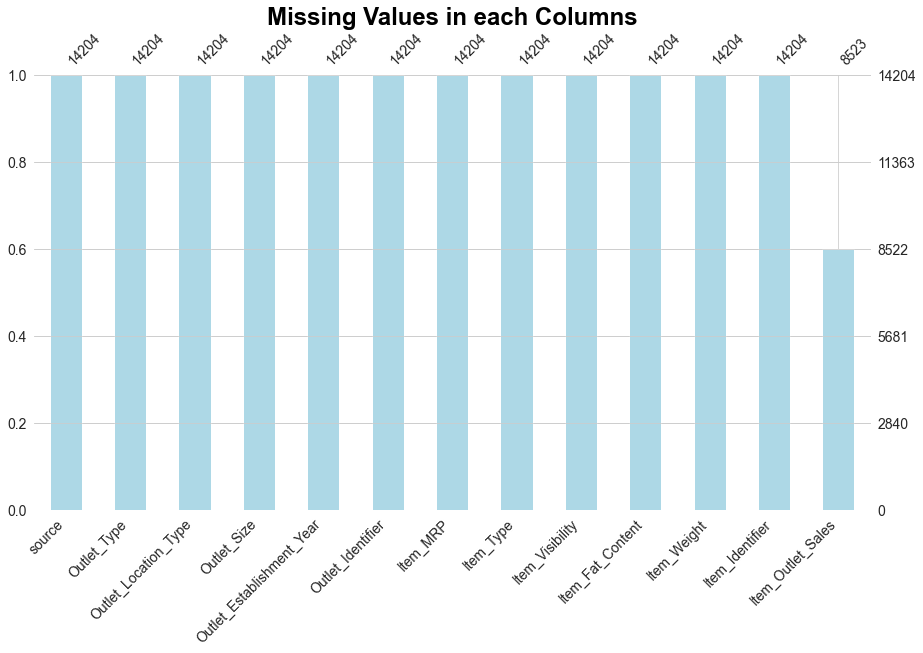

In [29]:
# --- Ploting / Checking Missing Values ---
mso.bar(dataset, fontsize=14, color='lightblue', figsize=(15, 8), sort='descending', labels=True)

# --- Title & Subtitle Settings ---
plt.title('Missing Values in each Columns', fontweight='bold', fontsize='24', fontfamily='sans-serif', color='black')
plt.grid(axis='both', alpha=0);

# --- Checking Null Values in Combined Dataset ---
print('.: Combined Dataset Null Values:.')
print('*' * 33)
dataset.isnull().sum()

In [30]:
# --- Reading Combined Dataset after data processing (Adding missing values) ---
dataset.head(10).style.background_gradient(cmap='BuPu').set_properties(**{'border': '1px solid black'})

In [31]:
# --- Reading Combined Dataset after data processing (Adding missing values) ---
dataset.tail(10).style.background_gradient(cmap='BuPu').set_properties(**{'border': '1px solid black'})

In [32]:
# --- Counting Categorical Labels (Outlet Identifier) without Dropping Null Values ---
print('.: Outlet_Identifier Total :.')
print('*' * 29)
dataset.Outlet_Identifier.value_counts(dropna=False)

.: Outlet_Identifier Total :.
*****************************


OUT027    1559
OUT013    1553
OUT049    1550
OUT046    1550
OUT035    1550
OUT045    1548
OUT018    1546
OUT017    1543
OUT010     925
OUT019     880
Name: Outlet_Identifier, dtype: int64

In [33]:
# --- Data Visualization for Item Fat Content of Combined Dataset(including similar values) ---
# --- Setting Colors, Labels, Order ---
labels=dataset['Item_Fat_Content'].dropna().unique()
order=dataset['Item_Fat_Content'].value_counts().index

# --- Counting Categorical Labels (Item Fat Content) without Dropping Null Values ---
print('.: Item Fat Content Total :.')
print('*' * 29)
dataset.Item_Fat_Content.value_counts(dropna=False)

.: Item Fat Content Total :.
*****************************


Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

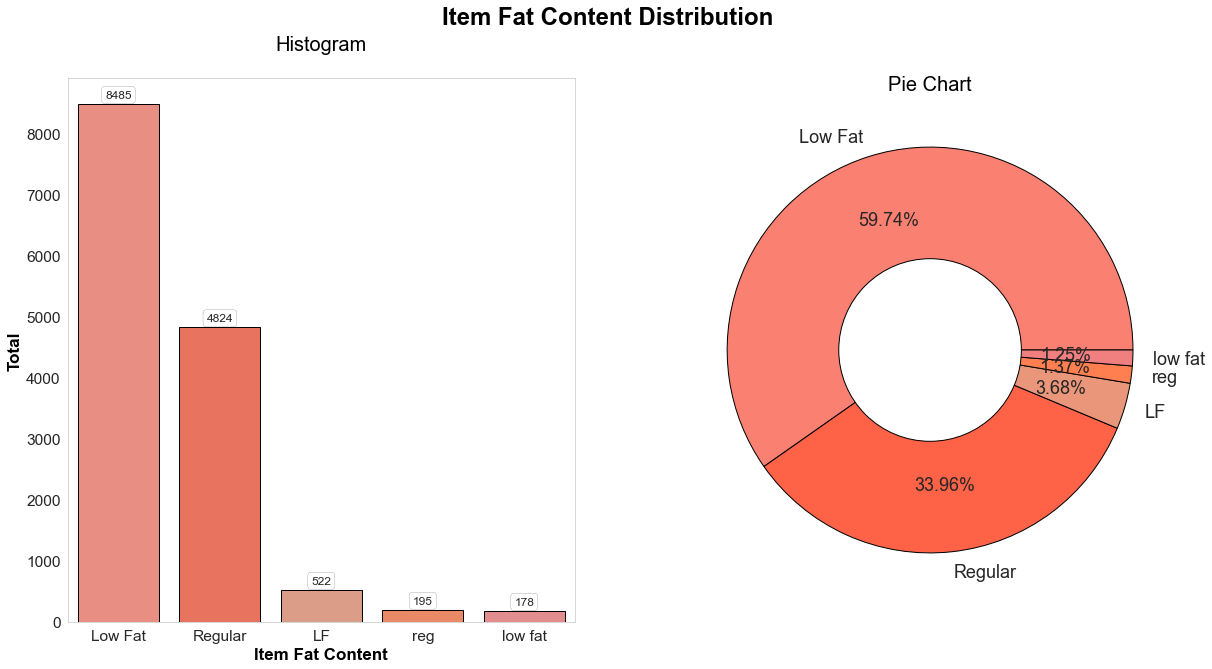

In [34]:
custom_colors = ['salmon', 'tomato', 'darksalmon', 'coral', 'lightcoral'] 
# --- Size for Both Figures ---
plt.figure(figsize=(20, 10))
plt.suptitle('Item Fat Content Distribution', fontweight='bold', fontsize='24', fontfamily='sans-serif', color='black')

# --- Histogram ---
countplt = plt.subplot(1, 2, 1)
plt.title('Histogram\n', fontsize=20, fontfamily='sans-serif', color='black')
ax = sns.countplot(x='Item_Fat_Content', data=dataset, palette=custom_colors, order=order, edgecolor='black')
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, rect.get_height()+100,rect.get_height(), horizontalalignment='center', fontsize=12, bbox=dict(facecolor='none', edgecolor='black', linewidth=0.15, boxstyle='round'))
    ax.tick_params(axis='x', labelsize=15.5)
    ax.tick_params(axis='y', labelsize=15.5)
plt.xlabel('Item Fat Content', fontweight='bold', fontsize=17, fontfamily='sans-serif', color='black')
plt.ylabel('Total', fontweight='bold', fontsize=17, fontfamily='sans-serif', color='black')
plt.grid(axis='y')
countplt

# --- Pie Chart ---
plt.subplot(1, 2, 2)
plt.title('Pie Chart', fontsize=20, fontfamily='sans-serif', color='black')
plt.pie(dataset['Item_Fat_Content'].value_counts(), colors=custom_colors, labels=order, pctdistance=0.67, autopct='%.2f%%', wedgeprops=dict(edgecolor='black'), textprops={'fontsize':18})
centre=plt.Circle((0, 0), 0.45, fc='white', edgecolor='black')
plt.gcf().gca().add_artist(centre)

In [35]:
# --- Data Visualization for Item Fat Content of Combined Dataset ---
# --- Replacing similar values with a specific value ---
dataset['Item_Fat_Content'] = dataset['Item_Fat_Content'].replace({'low fat':'Low Fat','reg':'Regular','LF':'Low Fat'})

labels=dataset['Item_Fat_Content'].dropna().unique()
order=dataset['Item_Fat_Content'].value_counts().index

print('.: Item Fat Content Total :.')
print('*' * 29)
dataset.Item_Fat_Content.value_counts()

.: Item Fat Content Total :.
*****************************


Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

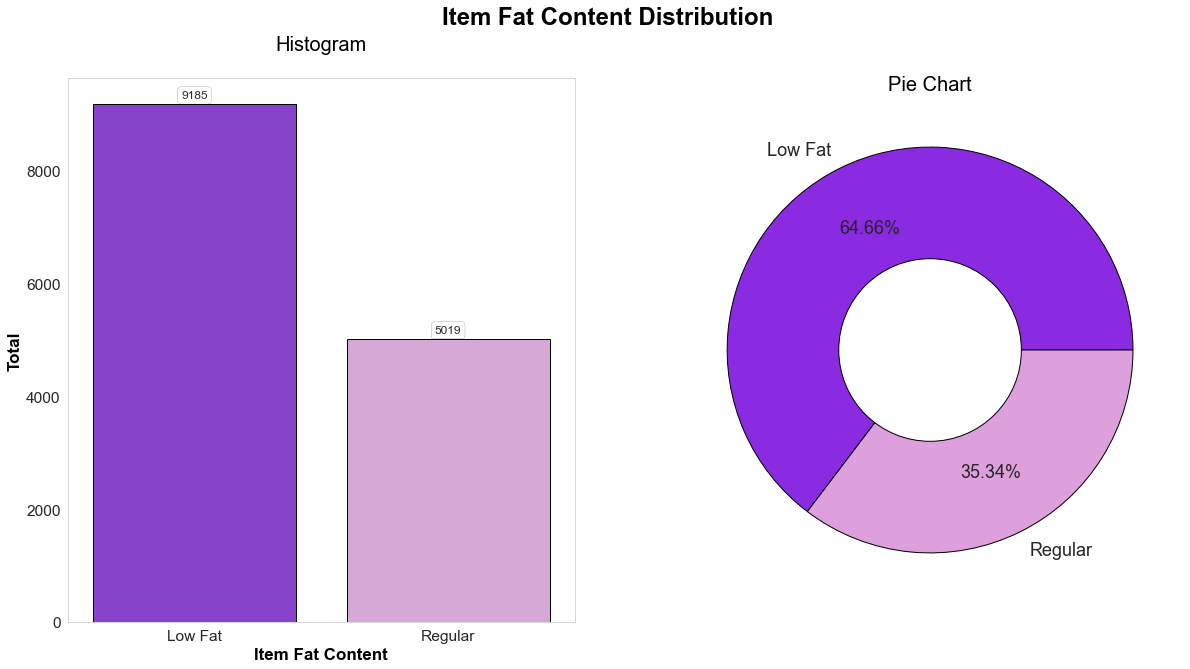

In [36]:
custom_colors = ['blueviolet', 'plum'] 
# --- Size for Both Figures ---
plt.figure(figsize=(20, 10))
plt.suptitle('Item Fat Content Distribution', fontweight='bold', fontsize='24', fontfamily='sans-serif', color='black')

# --- Histogram ---
countplt = plt.subplot(1, 2, 1)
plt.title('Histogram\n', fontsize=20, fontfamily='sans-serif', color='black')
ax = sns.countplot(x='Item_Fat_Content', data=dataset, palette=custom_colors, order=order, edgecolor='black')
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, rect.get_height()+100,rect.get_height(), horizontalalignment='center', fontsize=12, bbox=dict(facecolor='none', edgecolor='black', linewidth=0.15, boxstyle='round'))
    ax.tick_params(axis='x', labelsize=15.5)
    ax.tick_params(axis='y', labelsize=15.5)
plt.xlabel('Item Fat Content', fontweight='bold', fontsize=17, fontfamily='sans-serif', color='black')
plt.ylabel('Total', fontweight='bold', fontsize=17, fontfamily='sans-serif', color='black')
plt.grid(axis='y')
countplt

# --- Pie Chart ---
plt.subplot(1, 2, 2)
plt.title('Pie Chart', fontsize=20, fontfamily='sans-serif', color='black')
plt.pie(dataset['Item_Fat_Content'].value_counts(), colors=custom_colors, labels=order, pctdistance=0.67, autopct='%.2f%%', wedgeprops=dict(edgecolor='black'), textprops={'fontsize':18})
centre=plt.Circle((0, 0), 0.45, fc='white', edgecolor='black')
plt.gcf().gca().add_artist(centre)

In [37]:
# --- Data Visualization for Item Types and Fat Content of Combined Dataset ---
df_type=dataset.groupby('Item_Type').sum().reset_index()
print('\n')
fig2=px.sunburst(dataset,path=['Item_Type','Item_Fat_Content'],color_continuous_scale='RdBu')
fig2.update_layout(title='Item Types and Fat Content', title_x=0.5,title_y=0.999,font_size=15, annotations=[dict(showarrow=True,height=1010,width=900)],margin=dict(l=20, r=20, t=20, b=20))
fig2.show()

In [38]:
# --- Calculating Current Total number of Years from establishment ---
dataset['Outlet_Year'] = 2023 - dataset['Outlet_Establishment_Year']
dataset.drop(['Outlet_Establishment_Year'],axis=1,inplace=True)
dataset.Outlet_Year.unique()

array([24, 14, 25, 36, 38, 21, 16, 26, 19], dtype=int64)

In [39]:
# --- Reading Combined Dataset after data processing (Adding missing values and replacling similar values) ---
dataset.head(10).style.background_gradient(cmap='BuPu').set_properties(**{'border': '1px solid black'})

In [40]:
# --- Calculating mean value of Item_Weight for every Unique item present in dataset ---
vmean = dataset.pivot_table(index = "Item_Identifier",  values = "Item_Visibility")
print(vmean)

                 Item_Visibility
Item_Identifier                 
DRA12                   0.034938
DRA24                   0.045646
DRA59                   0.133384
DRB01                   0.079736
DRB13                   0.006799
...                          ...
NCZ30                   0.027302
NCZ41                   0.056396
NCZ42                   0.011015
NCZ53                   0.026330
NCZ54                   0.081345

[1559 rows x 1 columns]


In [41]:
# --- Updating the zero visibility item values of dataset with mean values ---
dataset.loc[(dataset["Item_Visibility"] == 0.0), "Item_Visibility"] = dataset.loc[(dataset["Item_Visibility"] == 0.0), "Item_Identifier"].apply(lambda x : vmean.at[x, "Item_Visibility"])

In [42]:
# --- Saving the updated combined dataset to new file ---
dataset.to_csv('insight.csv')

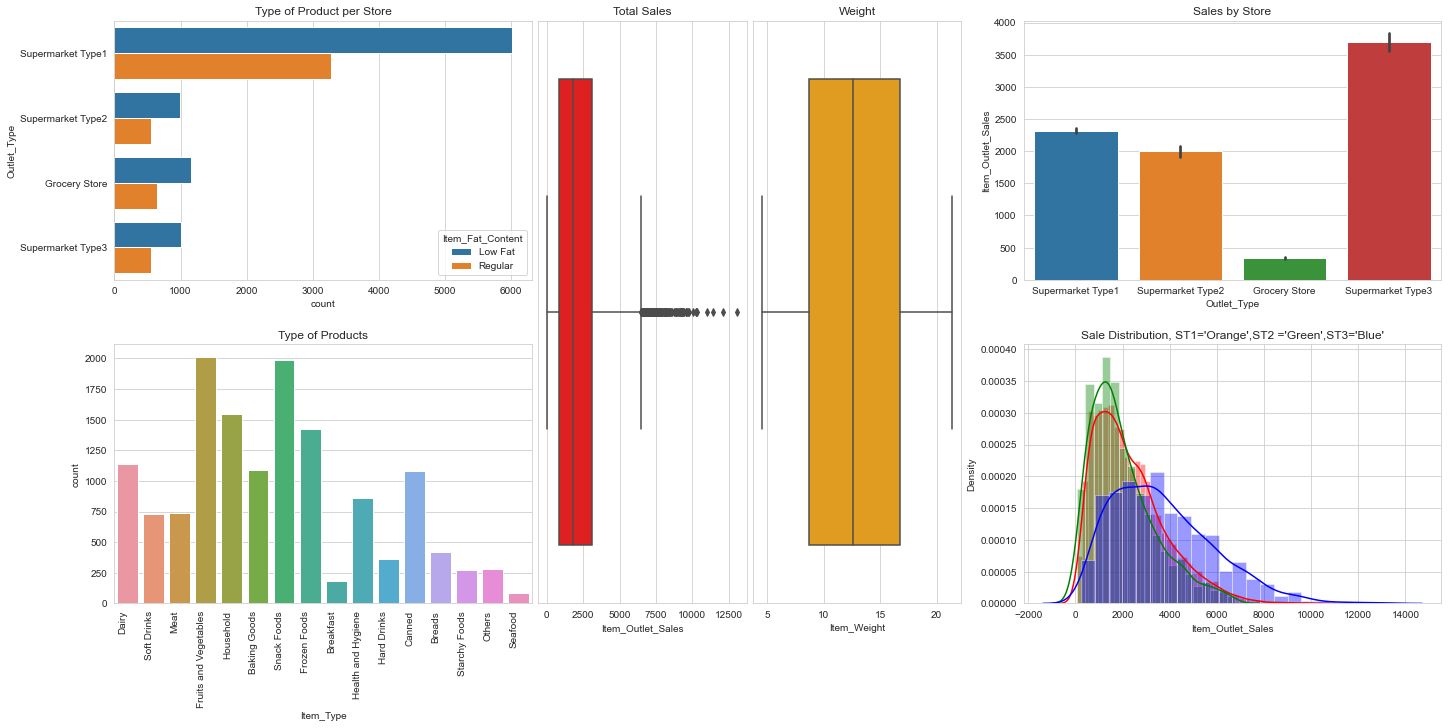

In [43]:
# --- Creating Dashboard of completly processed dataset ---
fig = plt.figure(constrained_layout=True, figsize=(20,10))
grid = gridspec.GridSpec(ncols=6, nrows=2, figure=fig)

# --- bar plot Horizontal ---
ax1 = fig.add_subplot(grid[0, :2])
ax1.set_title('Type of Product per Store')
sns.countplot(y='Outlet_Type',hue = 'Item_Fat_Content',data = dataset, ax=ax1) #Outlet Type

# --- bar plot Vertical ---
ax2 = fig.add_subplot(grid[1, :2])
ax2.set_title('Type of Products')
bar = sns.countplot(x='Item_Type', data = dataset, ax = ax2)
bar.set_xticklabels(bar.get_xticklabels(),  rotation=90, horizontalalignment='right') #Type of Products

# --- box plot Sales ---
ax3 = fig.add_subplot(grid[:, 2])
ax3.set_title('Total Sales')
sns.boxplot(train.loc[:,'Item_Outlet_Sales'], orient='v', ax = ax3, color = 'Red') #Total Sales

# --- box plot Monthly payment ---
ax4 = fig.add_subplot(grid[:,3])
ax4.set_title("Weight")
sns.boxplot(dataset['Item_Weight'], orient='v' ,ax=ax4, color = 'Orange')


# --- Displot Distribution ---
ax5 = fig.add_subplot(grid[0, 4:6])
ax5.set_title("Sales by Store")
sns.barplot(x='Outlet_Type', y='Item_Outlet_Sales',data=dataset,ax=ax5) 


# --- Displot Distribution ---
ax6 = fig.add_subplot(grid[1, 4:6])
ax6.set_title("Sale Distribution, ST1='Orange',ST2 ='Green',ST3='Blue'")
SuperT1 = dataset[dataset['Outlet_Type']=='Supermarket Type1']
SuperT2 = dataset[dataset['Outlet_Type']=='Supermarket Type2']
SuperT3 = dataset[dataset['Outlet_Type']=='Supermarket Type3']
Grocery = dataset[dataset['Outlet_Type']=='Grocery Store']

sns.distplot(SuperT1['Item_Outlet_Sales'], color = 'Red', ax=ax6)
sns.distplot(SuperT2['Item_Outlet_Sales'], color = 'Green', ax=ax6)
sns.distplot(SuperT3['Item_Outlet_Sales'], color = 'Blue', ax=ax6)

plt.show()